In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
#from mplfinance import candlestick_ohlc
!pip install mplfinance
from mplfinance.original_flavor import candlestick_ohlc
# Default number of currencies we will look at at each step
x = 10

In [2]:
df = pd.read_csv('markets.csv')
df = df[df['date'].notna()]
df.head()
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print("Latest crypto data")
latest_df = df[df['date'] == max(df['date'])]
latest_df.head()

Latest crypto data


,index,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
2041,2042.0,bitcoin,BTC,Bitcoin,2018-11-29,1.0,4269.000000,4413.020000,4145.770000,4278.850000,6.503348e+09,7.445102e+10,0.4980,267.25
3985,3986.0,ripple,XRP,XRP,2018-11-29,2.0,0.391862,0.392465,0.373789,0.379562,6.299006e+08,1.530674e+10,0.3091,0.02
5196,5197.0,ethereum,ETH,Ethereum,2018-11-29,3.0,122.720000,123.230000,115.300000,117.540000,2.196099e+09,1.216629e+10,0.2825,7.93
6774,6775.0,stellar,XLM,Stellar,2018-11-29,4.0,0.161831,0.172107,0.155423,0.165080,8.886206e+07,3.162026e+09,0.5788,0.02
7269,7270.0,bitcoin-cash,BCH,Bitcoin Cash,2018-11-29,5.0,190.100000,191.150000,176.830000,180.980000,8.916690e+07,3.164359e+09,0.2898,14.32


Open is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day), High is the highest price of the stock on that trading day, Low the lowest price of the stock on that trading day, and Close the price of the stock at closing time.

In [3]:
# Number of cryptocurrencies listed
#latest_df.shape
print("Number of cryptocurrencies listed")
latest_df['symbol'].nunique()

Number of cryptocurrencies listed


9

In [4]:
# What start date do we have for each cryptocurrency?
start_df = pd.DataFrame({'start_date' : df.groupby( [ "name", "ranknow"] )['date'].min()}).reset_index()

# List the oldest ones
print("Oldest Cryptocurrencies")
start_df.sort_values(['start_date']).head(x)

Oldest Cryptocurrencies


,name,ranknow,start_date
0,Bitcoin,1.0,2013-04-28
5,Litecoin,7.0,2013-04-28
8,XRP,2.0,2013-08-04
6,Stellar,4.0,2014-08-05
7,Tether,8.0,2015-02-25
4,Ethereum,3.0,2015-08-07
3,EOS,6.0,2017-07-01
1,Bitcoin Cash,5.0,2017-07-23
2,Cardano,10.0,2017-10-01


In [5]:
# List the newest ones
print("Newest Cryptocurrencies")
start_df.sort_values(['start_date']).tail(x)

Newest Cryptocurrencies


,name,ranknow,start_date
0,Bitcoin,1.0,2013-04-28
5,Litecoin,7.0,2013-04-28
8,XRP,2.0,2013-08-04
6,Stellar,4.0,2014-08-05
7,Tether,8.0,2015-02-25
4,Ethereum,3.0,2015-08-07
3,EOS,6.0,2017-07-01
1,Bitcoin Cash,5.0,2017-07-23
2,Cardano,10.0,2017-10-01


In [6]:
# Get a list of the top x currencies
latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()

ranknow
1.0          [Bitcoin]
2.0              [XRP]
3.0         [Ethereum]
4.0          [Stellar]
5.0     [Bitcoin Cash]
6.0              [EOS]
7.0         [Litecoin]
8.0           [Tether]
10.0         [Cardano]
Name: name, dtype: object

In [7]:
# Is ranknow ordering the same as the marketcap ordering?
latest_df.sort_values(by=['market'], ascending=[False])
latest_df[['name','market']].head(x)

,name,market
2041,Bitcoin,7.445102e+10
3985,XRP,1.530674e+10
5196,Ethereum,1.216629e+10
6774,Stellar,3.162026e+09
7269,Bitcoin Cash,3.164359e+09
7786,EOS,2.738537e+09
9828,Litecoin,2.006242e+09
11197,Tether,1.851553e+09
11622,Cardano,1.085456e+09


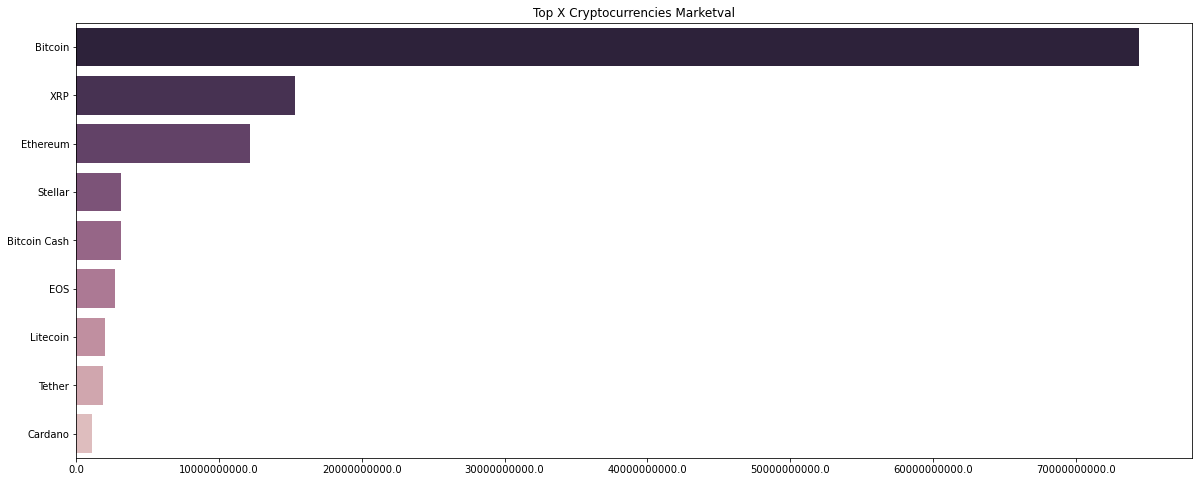

In [8]:
# Plot the top X currencies latest marketval
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

Volume is a measure of how much of a given financial asset has been traded in a given period of time and even though so simple, it can be a powerful indicator for trading.

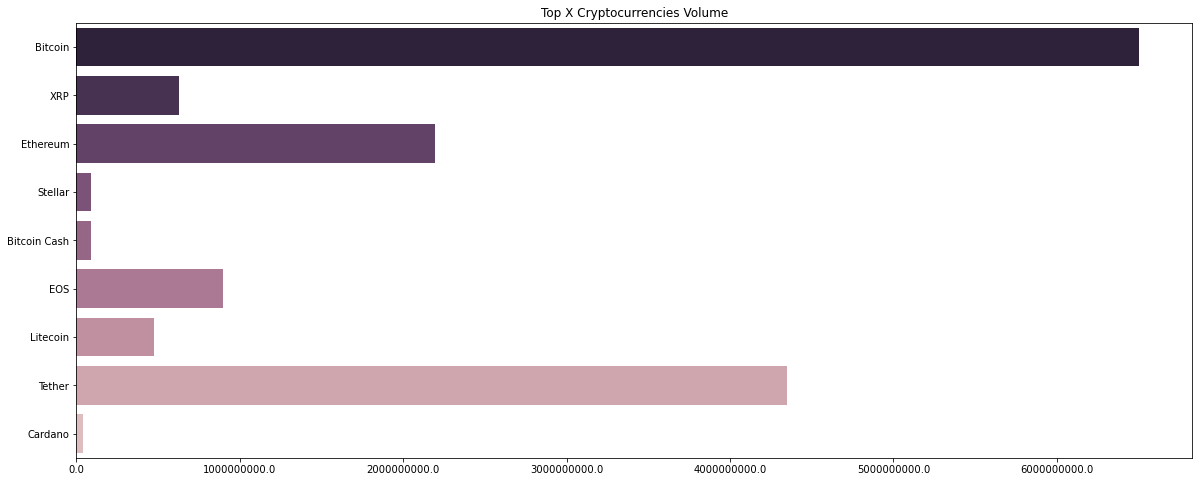

In [9]:
# Plot the top X currencies latest volume 
latest_df
currency  = []
volume = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])
        
f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Volume")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

A rising market should see rising volume. Buyers require increasing numbers and increasing enthusiasm in order to keep pushing prices higher. Increasing price and decreasing volume show lack of interest



If the stock closes higher than its opening price, a hollow/green candlestick is drawn with the bottom of the body representing the opening price and the top of the body representing the closing price.

If the stock closes lower than its opening price, a filled/red candlestick is drawn with the top of the body representing the opening price and the bottom of the body representing the closing price.



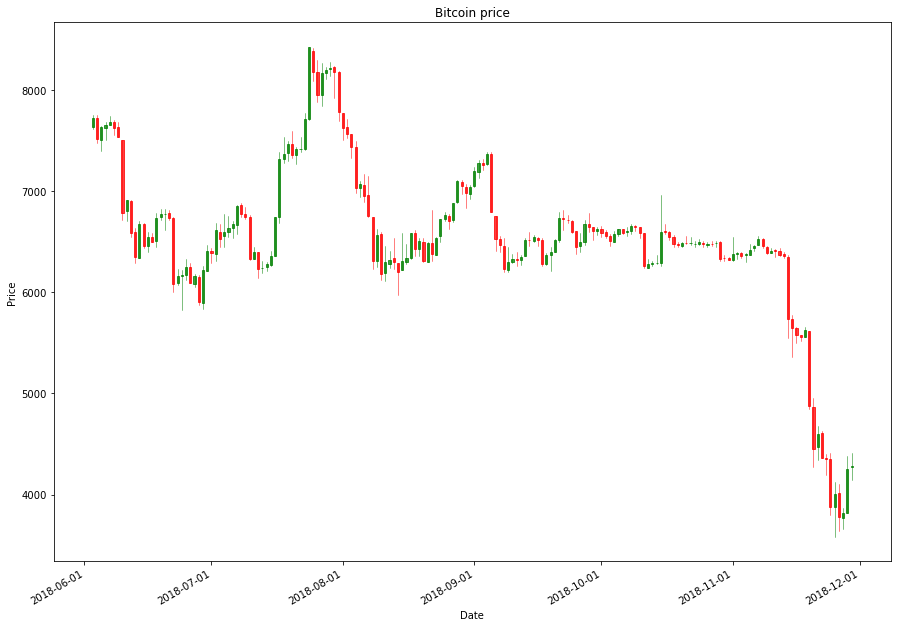

In [10]:
# Candlestick chart for Rank 1 currency (limited to 6 Months)
rank = 1
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

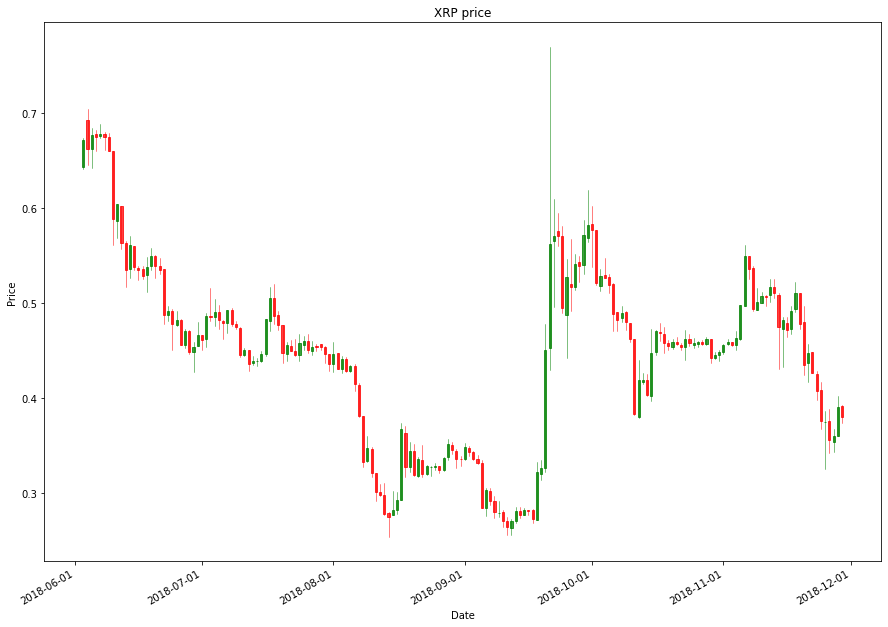

In [11]:
# Candlestick chart for Rank 2 currency (limited to 6 Months)
rank = 2
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

Let’s now consider how we can find trends in stocks.

Moving averages are one of the oldest and simplest tradng "tools" which we can use.

A n-day moving average is, for a series and a point in time, the average of the past n days.

Moving averages smooth a series and helps identify trends. The larger n is, the less responsive a moving average process is to short-term fluctuations in the series. The idea is that moving average processes help identify trends from “noise”.

Exponentially Weighted Moving Average is a statistic for monitoring the process that averages the data in a way that gives less and less weight to data as they are further removed in time.

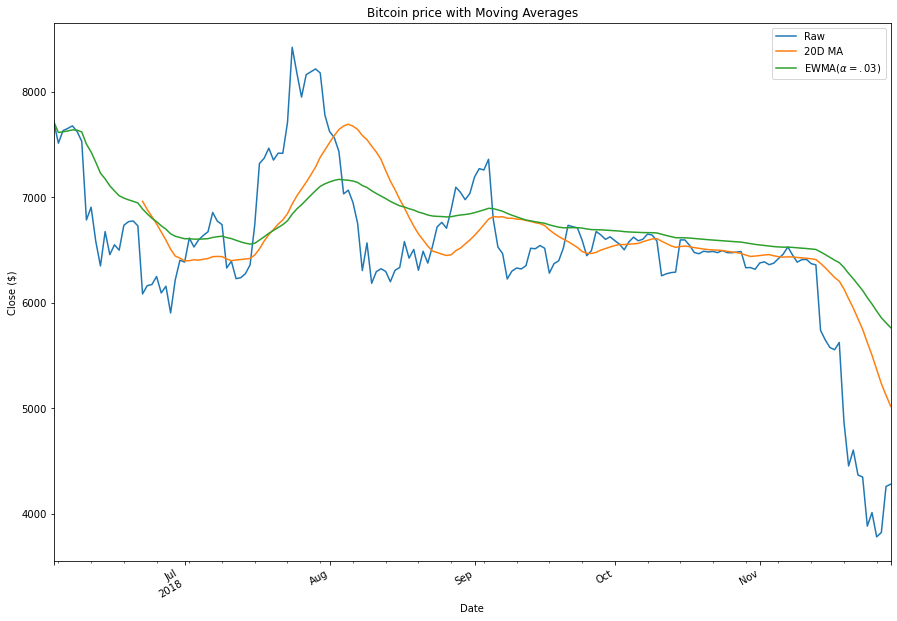

In [12]:
# Moving average chart for Rank 1 currency (6 months)
rank = 1
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

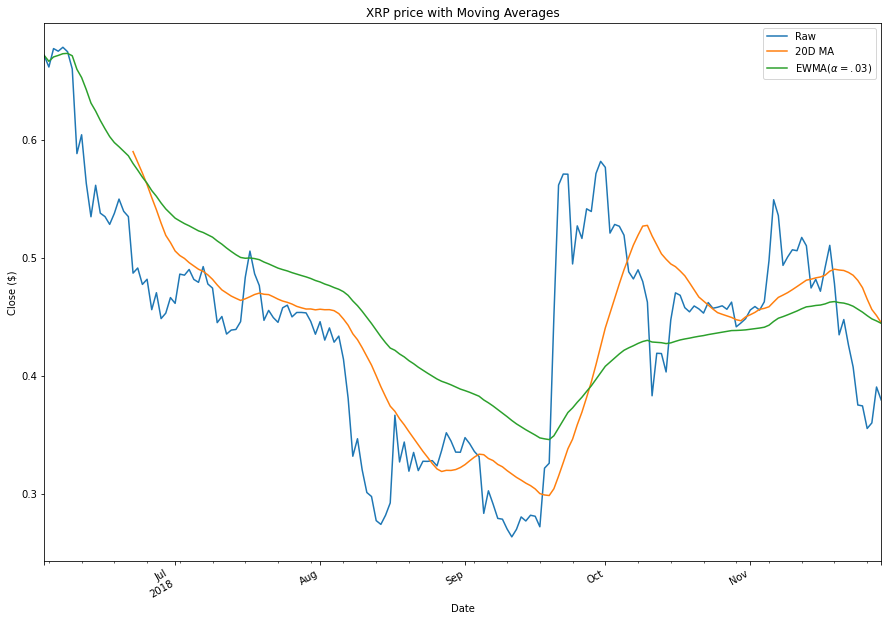

In [13]:
# Moving average chart for Rank 2 currency (6 months)
rank = 2
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

Some consider there to be three important moving averages that can be applied to charts to help trade better. They are the following:

The 20 moving average (20MA) is the short-term outlook. The 50 moving average (50MA) is the medium term outlook. The 200 moving average (200MA) is the trend bias. In a good uptrend the price should be above the 20MA, the 20MA above the 50MA and the 50MA above the 200MA. In a solid downtrend the price will be below the 20MA, the 20MA below the 50MA and the 50MA below the 200MA.

Lets see how this can apply to Bitcoin and Ethereum...

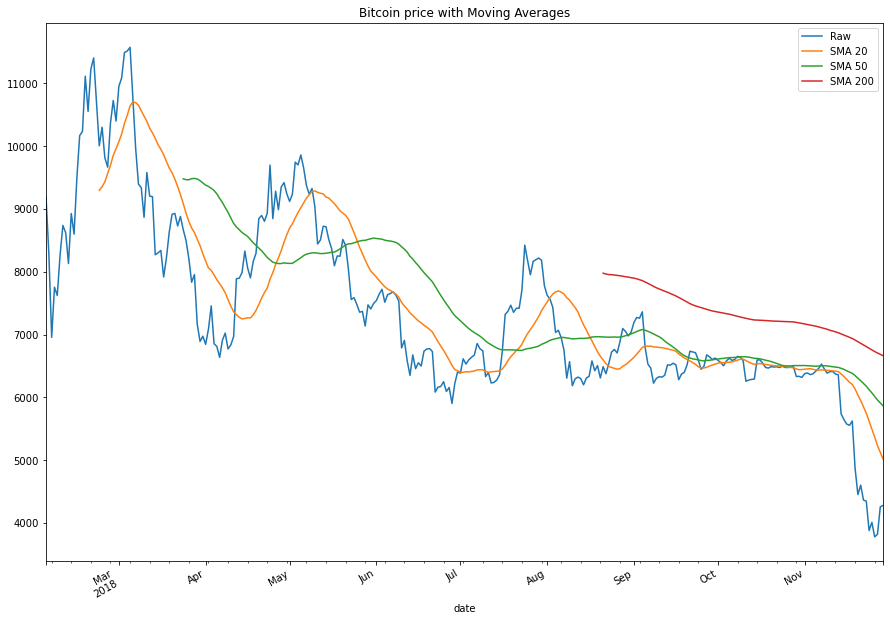

In [14]:
# Moving average chart for Rank 1 currency (10 months)
rank = 1
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

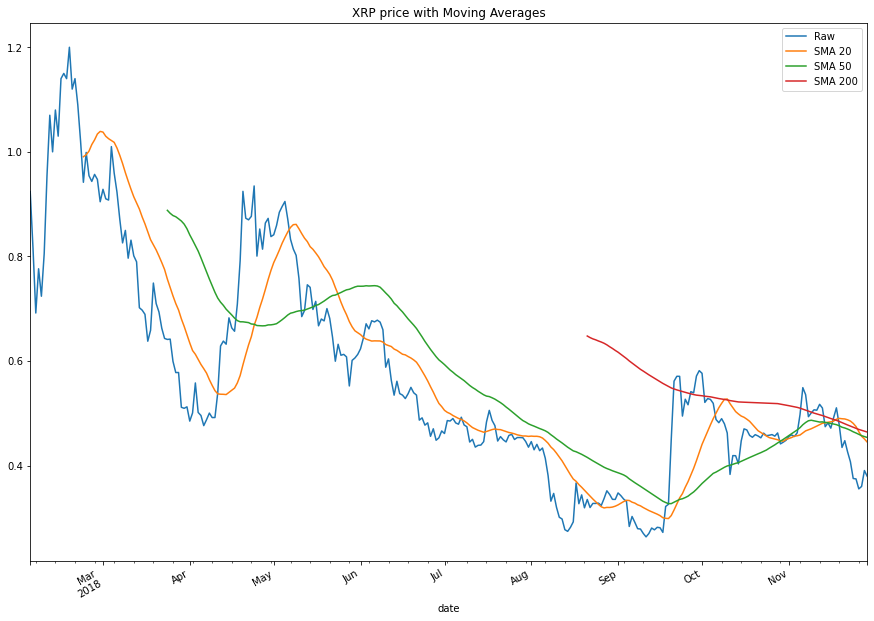

In [15]:
# Moving average chart for Rank 2 currency (10 months)
rank = 2
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

Visualising spread of closing price among various crypto

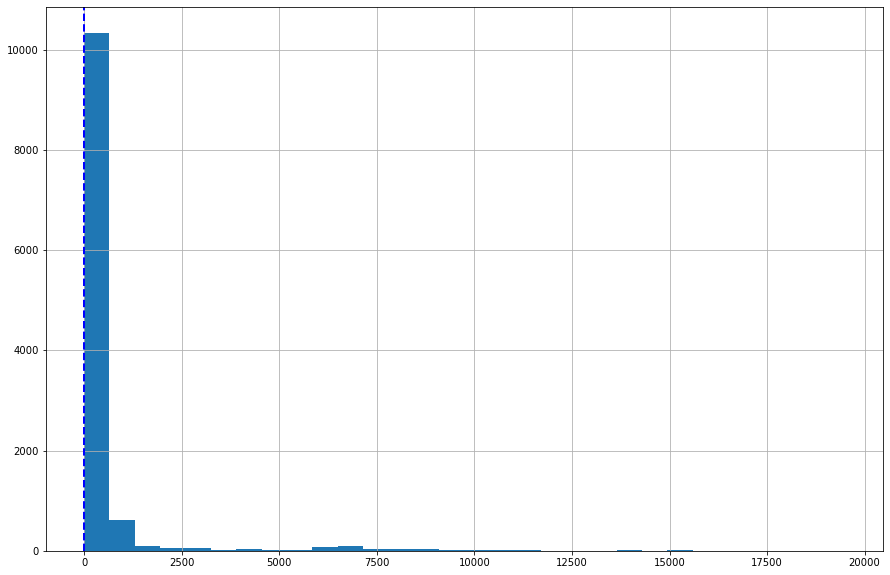

In [16]:
df['close'].hist(bins=30, figsize=(15,10)).axvline(df['close'].median(), color='b', linestyle='dashed', linewidth=2)

Visualising spread of market cap amongst various crpytocurrencies

<AxesSubplot:xlabel='symbol', ylabel='market'>

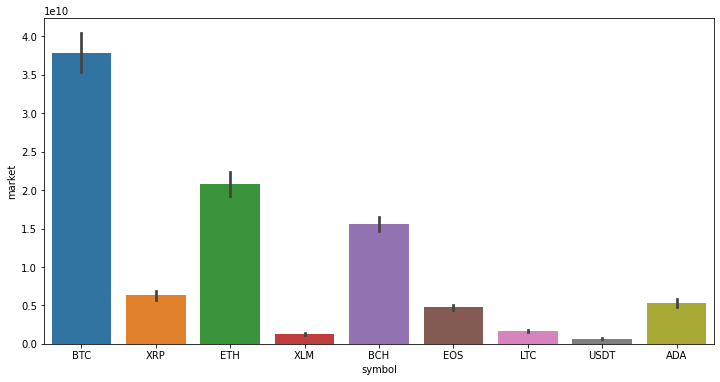

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='symbol', y='market', data=df, estimator=np.mean)


Heatmap visulasss

<AxesSubplot:>

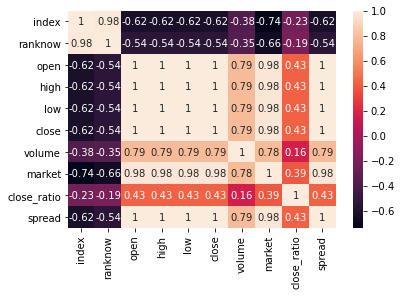

In [18]:
sns.heatmap(latest_df.corr(),annot=True)

LINEAR REGRESSION CODE

In [19]:
X=latest_df[['open', 'high', 'low', 'volume', 'market']]
y=latest_df['close']
y = np.where(df['close'].shift(-1) > df['close'], 1, -1)

X = pd.DataFrame(X)
y = pd.DataFrame(y)


In [20]:
import random
random.seed(1234)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

ValueError: Found input variables with inconsistent numbers of samples: [9, 11623]

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
msk=np.random.rand(len(df)) < 0.8
train=df[msk]
test=df[~msk]

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
X_train = np.asanyarray(train[['open', 'high', 'low', 'volume', 'market']])
y_train = np.asanyarray(train[['close']])
lm.fit(X_train, y_train)

In [ ]:
print("Intercept : {}".format(lm.intercept_))

In [ ]:
print("Coeff :\n {}".format(lm.coef_))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm,X_train,y_train,cv = 5)
print("R-squared score for training",scores.mean())

In [ ]:
yhat=lm.predict(X_test)
yhat

In [ ]:
from sklearn.metrics import r2_score
X_test=np.asanyarray(test[['open', 'high', 'low', 'volume', 'market']])
y_test=np.asanyarray(test[['close']])
yhat=lm.predict(X_test)



In [ ]:
print("Mean absolute error: %2f" % np.mean(np.absolute(yhat-y_test)))
print("Residual sum of errors (MSE): %2f" % np.mean(yhat-y_test)**2)
print("R2_score: %2f" % r2_score(yhat,y_test))